# Pendahuluan


## Latar Belakang

Analisis Pasar Airbnb di Kota New York

Selamat datang di Kota New York, salah satu destinasi paling populer di dunia. Terdapat banyak penawaran Airbnb di kota ini untuk memenuhi permintaan tinggi akan akomodasi sementara, baik untuk beberapa malam maupun beberapa bulan. Dalam analisis ini, kita akan mengeksplor lebih lanjut pasar Airbnb di New York dengan menggabungkan data dari berbagai jenis file, seperti .csv, .tsv, dan .xlsx.

Mohon dicatat bahwa file CSV, TSV, dan Excel adalah tiga format umum untuk menyimpan data. Terdapat tiga file yang berisi data mengenai listing Airbnb pada tahun 2019:

1. data/airbnb_price.csv
    - listing_id: identifikasi unik untuk setiap listing
    - price: harga sewa per malam dalam USD
    - nbhood_full: nama lokasi dan lingkungan di mana listing tersebut berada
2. data/airbnb_room_type.xlsx
    - listing_id: identifikasi unik untuk setiap listing
    - description: deskripsi listing
    - room_type: Airbnb memiliki tiga jenis kamar: kamar bersama, kamar pribadi, dan seluruh rumah/apartemen
3. data/airbnb_last_review.tsv
    - listing_id: identifikasi unik untuk setiap listing
    - host_name: nama tuan rumah dari listing
    - last_review: tanggal terakhir kali listing tersebut direview



## Pertanyaan Bisnis
Tujuan analisis ini adalah mengubah data yang tidak terstruktur menjadi format yang cocok untuk dianalisis dan menjawab pertanyaan kunci berikut:

1. Bagaimana perbandingan harga rata-rata tertinggi dan terendah di 5 lokasi?
2. Bagaimana perbandingan harga rata-rata listing Airbnb per bulan dengan pasar sewa swasta?
3. Berapa jumlah iklan untuk kamar pribadi?
4. Bagaimana perbandingan harga listing Airbnb di lima wilayah di NYC?

Untuk menjawab pertanyaan-pertanyaan tersebut, berikut adalah langkah-langkah yang dapat diambil:

# 1. Data Wrangling:

Tahapan yang akan dilakukan adalah:

1. Persiapan
2. Penilaian Data
3. Pembersihan Data

## Persiapan

In [1]:
# Menyiapkan semua library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Memuat tabel df_price
df_price = pd.read_csv("/content/drive/MyDrive/Air BNB New York Dataset/airbnb_price.csv")
print(df_price.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown


In [3]:
# Memuat tabel df_room_type
df_room_type = pd.read_excel("/content/drive/MyDrive/Air BNB New York Dataset/airbnb_room_type.xlsx")
print(df_room_type.head())

   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt


In [4]:
# Memuat tabel df_last_review
df_last_review = pd.read_csv("/content/drive/MyDrive/Air BNB New York Dataset/airbnb_last_review.tsv", delimiter='\t')
print(df_last_review.head())

   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben  June 09 2019


## Penilaian Data

### df_price

In [5]:
# Menilai data df_price
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [6]:
# Menilai missing value
df_price.isna().sum()

listing_id     0
price          0
nbhood_full    0
dtype: int64

In [7]:
# Menilai duplikasi data
print("Jumlah duplikasi: ", df_price.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
# Melihat ringkasan parameter statistik
df_price.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


### df_room_tyoe

In [9]:
# Menilai data df_room_type
df_room_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [10]:
# Menilai missing value
df_room_type.isna().sum()

listing_id      0
description    10
room_type       0
dtype: int64

In [11]:
# Menilai duplikasi data
print("Jumlah duplikasi: ", df_room_type.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
# Melihat ringkasan parameter statistik
df_room_type.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


### df_last_review

In [13]:
# Menilai data df_room_type
df_last_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [14]:
# Menilai missing value
df_last_review.isna().sum()

listing_id     0
host_name      8
last_review    0
dtype: int64

In [15]:
# Menilai duplikasi data
print("Jumlah duplikasi: ", df_last_review.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
# Melihat ringkasan parameter statistik
df_last_review.describe()

,listing_id
count,2.520900e+04
mean,2.068922e+07
std,1.102928e+07
min,2.595000e+03
25%,1.202273e+07
50%,2.234391e+07
75%,3.037669e+07
max,3.645581e+07


Dari tahapan yang dilakukan maka dapat terlihat beberapa masalah antara lain:
- merubah type data pada df_price kolom price berupa type object menjadi type float
- terdapat 10 missing value pada df_room_type kolom description yang memuat deskripsi listing
- terdapaty 8 missing value pada df_last_review kolom host_name yang memuat nama tuan rumah dari listing

## Data Cleaning

In [17]:
# merubah type data pada df_price kolom price berupa type object menjadi type float

# Konversi kolom price ke dalam tipe data string
df_price['price'] = df_price['price'].astype(str)
# Membersihkan dan mengonversi kolom price
df_price['price'] = df_price['price'].str.replace(' dollars', '').astype(float)
# Menampilkan DataFrame setelah perubahan
print(df_price.head())
print(df_price.info())

   listing_id  price                nbhood_full
0        2595  225.0         Manhattan, Midtown
1        3831   89.0     Brooklyn, Clinton Hill
2        5099  200.0     Manhattan, Murray Hill
3        5178   79.0  Manhattan, Hell's Kitchen
4        5238  150.0       Manhattan, Chinatown
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   listing_id   25209 non-null  int64  
 1   price        25209 non-null  float64
 2   nbhood_full  25209 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 591.0+ KB
None


In [18]:
# menangani missing value pada df_room_type kolom description yang memuat deskripsi listing

# Menggantikan nilai yang hilang dengan nilai default (misalnya, 'No description available')
df_room_type['description'].fillna('No description available', inplace=True)
# Menampilkan DataFrame setelah penggantian nilai yang hilang
print(df_room_type)
# Menampilkan informasi DataFrame setelah penggantian nilai yang hilang
print(df_room_type.info())
df_room_type.isna().sum()

       listing_id                                 description        room_type
0            2595                       Skylit Midtown Castle  Entire home/apt
1            3831             Cozy Entire Floor of Brownstone  Entire home/apt
2            5099   Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3            5178             Large Furnished Room Near B'way     private room
4            5238          Cute & Cozy Lower East Side 1 bdrm  Entire home/apt
...           ...                                         ...              ...
25204    36425863  Lovely Privet Bedroom with Privet Restroom     PRIVATE ROOM
25205    36427429                    No.2 with queen size bed     PRIVATE ROOM
25206    36438336                             Seas The Moment     Private room
25207    36442252               1B-1B apartment near by Metro  Entire home/apt
25208    36455809     Cozy Private Room in Bushwick, Brooklyn     Private room

[25209 rows x 3 columns]
<class 'pandas.core.frame.

listing_id     0
description    0
room_type      0
dtype: int64

In [19]:
# menangani missing value pada df_last_review kolom host_name yang memuat nama tuan rumah dari listing

# Menggantikan nilai yang hilang dengan nilai default (misalnya, 'No hostname available')
df_last_review['host_name'].fillna('No hostname available', inplace=True)
# Menampilkan DataFrame setelah penggantian nilai yang hilang
print(df_last_review)
# Menampilkan informasi DataFrame setelah penggantian nilai yang hilang
print(df_last_review.info())
df_last_review.isna().sum()

       listing_id    host_name   last_review
0            2595     Jennifer   May 21 2019
1            3831  LisaRoxanne  July 05 2019
2            5099        Chris  June 22 2019
3            5178     Shunichi  June 24 2019
4            5238          Ben  June 09 2019
...           ...          ...           ...
25204    36425863        Rusaa  July 07 2019
25205    36427429         H Ai  July 07 2019
25206    36438336          Ben  July 07 2019
25207    36442252       Blaine  July 07 2019
25208    36455809    Christine  July 08 2019

[25209 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25209 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None


listing_id     0
host_name      0
last_review    0
dtype: int64

In [20]:
# Perbaiki konsistensi dalam penulisan jenis kamar
df_room_type['room_type'] = df_room_type['room_type'].str.lower()

# Tampilkan DataFrame setelah perbaikan
print(df_room_type.head())


   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  entire home/apt
1        3831            Cozy Entire Floor of Brownstone  entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  entire home/apt


# 2. Eksplorasi Data (EDA)


Tahapan yang akan dilakukan untuk menjawab pertanyaan bisnis yang telah disiapkan adalah:
1. **Analisis Harga:**
    - Statistik deskriptif per lingkungan menggunakan data dari file **`airbnb_price.csv`**.
    - Menampilkan harga tertinggi dan terendah di 5 lokasi.
2. **Analisis Jenis Kamar:**
    - Gunakan data dari file **`airbnb_room_type.xlsx`** untuk menghitung jumlah iklan yang memiliki kamar pribadi.
3. **Perbandingan dengan Pasar Sewa Swasta:**
    - Bandingkan rata-rata harga Airbnb per bulan dengan data harga sewa swasta (jika tersedia).
4. **Analisis Harga berdasarkan Wilayah:**
    - Identifikasi wilayah dari setiap listing menggunakan data dari **`airbnb_price.csv`**.
    - Hitung rata-rata harga Airbnb untuk setiap wilayah.

In [21]:
# Gabungkan dataset berdasarkan kolom 'listing_id'
merged_df = pd.merge(df_price, df_room_type, on='listing_id')
merged_df = pd.merge(merged_df, df_last_review, on='listing_id')

# Tampilkan hasil gabungan
print(merged_df.head())

   listing_id  price                nbhood_full  \
0        2595  225.0         Manhattan, Midtown   
1        3831   89.0     Brooklyn, Clinton Hill   
2        5099  200.0     Manhattan, Murray Hill   
3        5178   79.0  Manhattan, Hell's Kitchen   
4        5238  150.0       Manhattan, Chinatown   

                                 description        room_type    host_name  \
0                      Skylit Midtown Castle  entire home/apt     Jennifer   
1            Cozy Entire Floor of Brownstone  entire home/apt  LisaRoxanne   
2  Large Cozy 1 BR Apartment In Midtown East  entire home/apt        Chris   
3            Large Furnished Room Near B'way     private room     Shunichi   
4         Cute & Cozy Lower East Side 1 bdrm  entire home/apt          Ben   

    last_review  
0   May 21 2019  
1  July 05 2019  
2  June 22 2019  
3  June 24 2019  
4  June 09 2019  


In [22]:
# Memisahkan kolom 'nbhood_full' menjadi dua kolom baru 'borough' dan 'neighborhood'
merged_df[['borough', 'neighborhood']] = merged_df['nbhood_full'].str.split(', ', 1, expand=True)

# Menghapus kolom 'nbhood_full'
merged_df = merged_df.drop('nbhood_full', axis=1)

# Menampilkan hasil setelah pemisahaan dan penghapusan
print(merged_df.head())


<ipython-input-22-b36652e6c738>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  merged_df[['borough', 'neighborhood']] = merged_df['nbhood_full'].str.split(', ', 1, expand=True)


   listing_id  price                                description  \
0        2595  225.0                      Skylit Midtown Castle   
1        3831   89.0            Cozy Entire Floor of Brownstone   
2        5099  200.0  Large Cozy 1 BR Apartment In Midtown East   
3        5178   79.0            Large Furnished Room Near B'way   
4        5238  150.0         Cute & Cozy Lower East Side 1 bdrm   

         room_type    host_name   last_review    borough    neighborhood  
0  entire home/apt     Jennifer   May 21 2019  Manhattan         Midtown  
1  entire home/apt  LisaRoxanne  July 05 2019   Brooklyn    Clinton Hill  
2  entire home/apt        Chris  June 22 2019  Manhattan     Murray Hill  
3     private room     Shunichi  June 24 2019  Manhattan  Hell's Kitchen  
4  entire home/apt          Ben  June 09 2019  Manhattan       Chinatown  


## 1. Bagaimana rata-rata harga per malam berdasarkan wilayah dan jenis kamar?

In [23]:
# Menghitung statistik deskriptif untuk distribusi harga per malam di setiap wilayah
price_distribution_by_borough = merged_df.groupby('borough')['price'].describe()

# Menampilkan hasil
print(price_distribution_by_borough)


                 count        mean         std   min   25%    50%    75%  \
borough                                                                    
Bronx            698.0   79.127507   58.087053   0.0  45.0   65.0   95.0   
Brooklyn       10466.0  121.904739  123.957822   0.0  63.0   95.0  150.0   
Manhattan      10322.0  184.000678  178.181024  10.0  95.0  149.0  215.0   
Queens          3456.0   92.813947   78.514658  10.0  50.0   70.0  109.0   
Staten Island    267.0   86.044944   54.624606  13.0  50.0   71.0  105.0   

                  max  
borough                
Bronx           670.0  
Brooklyn       7500.0  
Manhattan      5100.0  
Queens         2600.0  
Staten Island   300.0  


In [24]:
# Menghitung rata-rata harga per malam berdasarkan wilayah dan jenis kamar
average_price_by_borough_and_room_type = merged_df.groupby(['borough', 'room_type'])['price'].mean()

# Menampilkan hasil
print(average_price_by_borough_and_room_type)


borough        room_type      
Bronx          entire home/apt    120.517241
               private room        56.153465
               shared room         33.030303
Brooklyn       entire home/apt    169.903671
               private room        72.629328
               shared room         39.005291
Manhattan      entire home/apt    238.024473
               private room       105.698795
               shared room         72.960159
Queens         entire home/apt    140.931086
               private room        63.741165
               shared room         40.767857
Staten Island  entire home/apt    116.774436
               private room        56.060606
               shared room         21.500000
Name: price, dtype: float64


## 2. Bagaimana perbandingan tuan rumah berdasarkan lokasi?

In [25]:
# Menghitung jumlah tuan rumah unik di setiap wilayah
unique_hosts_by_borough = merged_df.groupby('borough')['host_name'].nunique()

# Menampilkan hasil
print(unique_hosts_by_borough)


borough
Bronx             435
Brooklyn         3851
Manhattan        3643
Queens           1630
Staten Island     166
Name: host_name, dtype: int64


In [26]:
# Menemukan 10 tuan rumah dengan jumlah listing terbanyak
top_hosts = merged_df['host_name'].value_counts().nlargest(10)

# Menampilkan hasil
print("10 tuan rumah dengan jumlah listing terbanyak:")
print(top_hosts)


10 tuan rumah dengan jumlah listing terbanyak:
Michael         215
Sonder (NYC)    207
David           197
John            177
Alex            153
Maria           122
Melissa         110
Daniel          103
Anna            103
Chris            94
Name: host_name, dtype: int64


## 3. Bagaimana perbandingan jumlah tuan rumah yang memiliki listing di lebih dari satu wilayah?

In [34]:
# Filter tuan rumah yang memiliki listing di 2, 3, 4, atau 5 wilayah
hosts_with_listings_in_multiple_boroughs = hosts_by_borough[hosts_by_borough.isin([2, 3, 4, 5])]

# Tampilkan hasil
print("Tuan rumah yang memiliki listing di 2, 3, 4, atau 5 wilayah:")
print(hosts_with_listings_in_multiple_boroughs)

Tuan rumah yang memiliki listing di 2, 3, 4, atau 5 wilayah:
host_name
A            3
A. Kaylee    2
A.J.         2
Aamir        2
Aaron        2
            ..
Zara         2
Zhenya       2
Zoe          3
Zoey         2
Zoraida      2
Name: borough, Length: 1542, dtype: int64


## 4. Siapa tuan rumah yang memiliki jumlah listing terbanyak berdasarkan wilayah?

In [30]:
# Menemukan 5 tuan rumah dengan jumlah listing terbanyak berdasarkan wilayah
top_hosts_by_borough = merged_df.groupby('borough')['host_name'].apply(lambda x: x.value_counts().nlargest(5))

# Menampilkan hasil
print("5 tuan rumah dengan jumlah listing terbanyak berdasarkan wilayah:")
print(top_hosts_by_borough)


5 tuan rumah dengan jumlah listing terbanyak berdasarkan wilayah:
borough                    
Bronx          Vie              10
               Orit              8
               Rem               7
               Carol             7
               Monica            6
Brooklyn       Melissa          81
               Michael          75
               David            68
               Alex             64
               John             64
Manhattan      Sonder (NYC)    207
               Michael         117
               David            98
               John             90
               Alex             77
Queens         Kazuya           36
               David            26
               Maria            20
               Carlos           19
               John             19
Staten Island  Maria             7
               Amarjit S         7
               Simranjeet        7
               Faye              6
               Lissette          6
Name: host_name, dtype: int64


# 3. Visualisasi Data


Tahapan yang akan dilakukan untuk membuat visualisai dari EDA adalah:
1. Visualisasi perbandingan harga rata-rata tertinggi dan terendah di 5 lokasi.
2. **Visualisasi Jenis Kamar:**
    - Gunakan diagram batang atau pie chart untuk memvisualisasikan jumlah iklan yang memiliki kamar pribadi.
3. **Perbandingan dengan Pasar Sewa Swasta:**
    - Gunakan grafik untuk membandingkan harga rata-rata Airbnb per bulan dengan harga sewa swasta.
4. **Visualisasi Perbandingan Harga berdasarkan Wilayah:**
    - Gunakan peta atau grafik lainnya untuk membandingkan rata-rata harga Airbnb di lima wilayah di NYC.

## 1. Rata-rata harga per malam berdasarkan wilayah dan jenis kamar

<ipython-input-38-7d5ded073067>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='room_type', hue='borough', data=merged_df, ci=None)


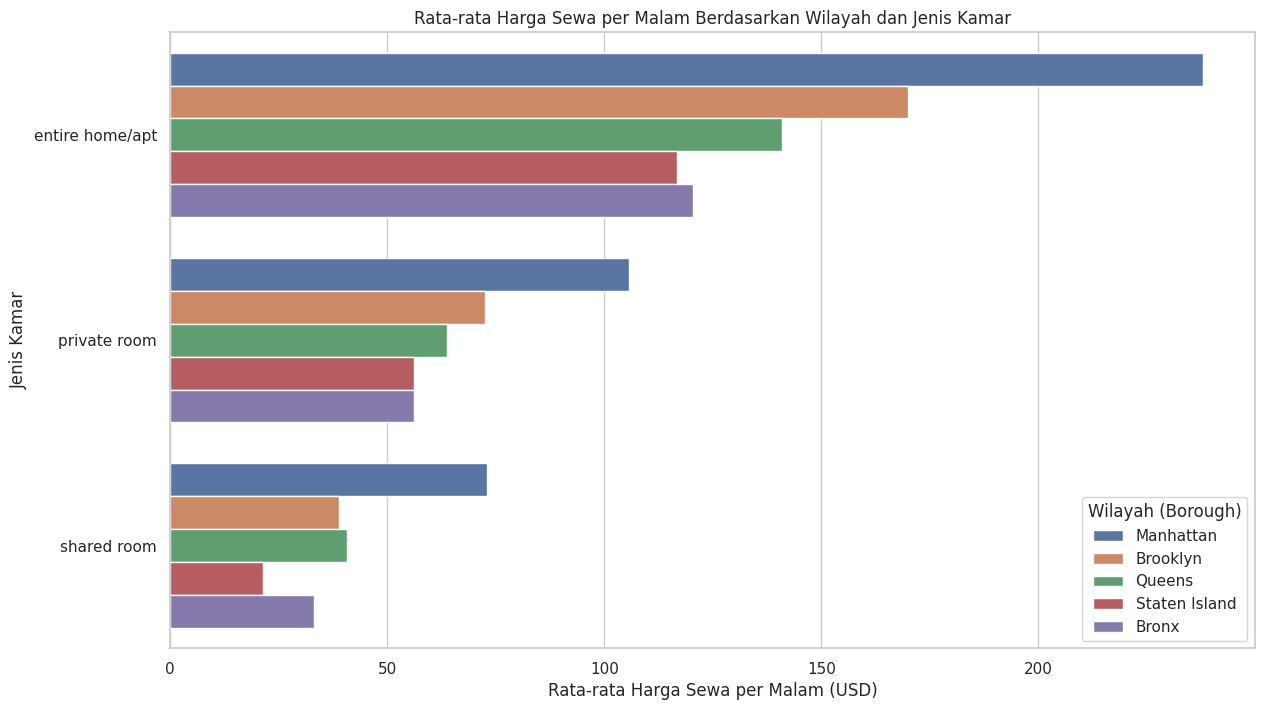

In [38]:
# Konfigurasi plot
plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='room_type', hue='borough', data=merged_df, ci=None)
plt.title('Rata-rata Harga Sewa per Malam Berdasarkan Wilayah dan Jenis Kamar')
plt.xlabel('Rata-rata Harga Sewa per Malam (USD)')
plt.ylabel('Jenis Kamar')
plt.legend(title='Wilayah (Borough)')
plt.show()


## 2. 10 tuan rumah dengan jumlah listing terbanyak disemua wilayah

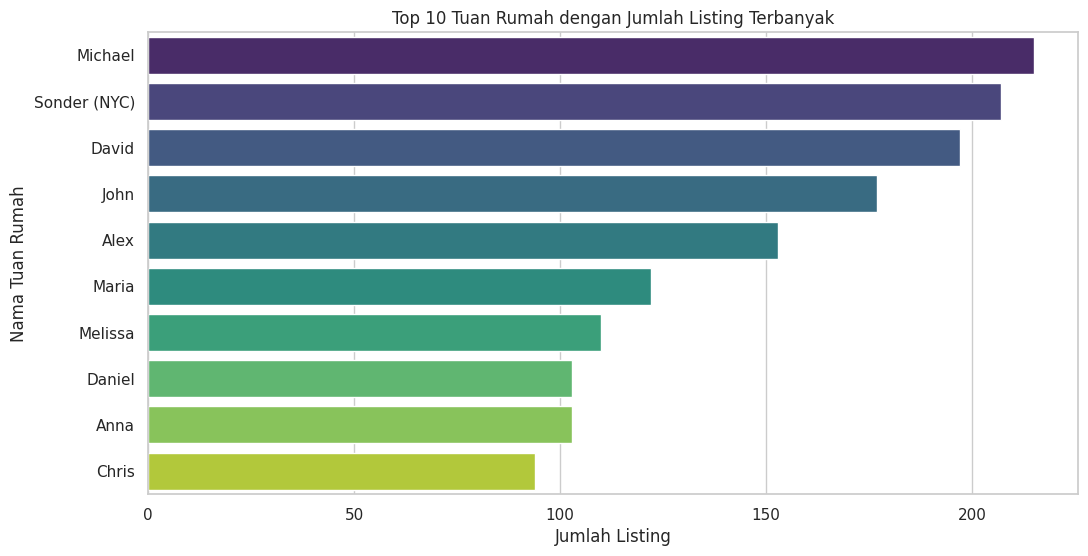

In [39]:
# Set style for better aesthetics (optional)
sns.set(style="whitegrid")

# Plotting the top hosts
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette="viridis")

# Adding labels and title
plt.xlabel('Jumlah Listing')
plt.ylabel('Nama Tuan Rumah')
plt.title('Top 10 Tuan Rumah dengan Jumlah Listing Terbanyak')

# Show the plot
plt.show()

## 3. Tuan rumah yang memiliki lebih listing lebih dari satu wilayah

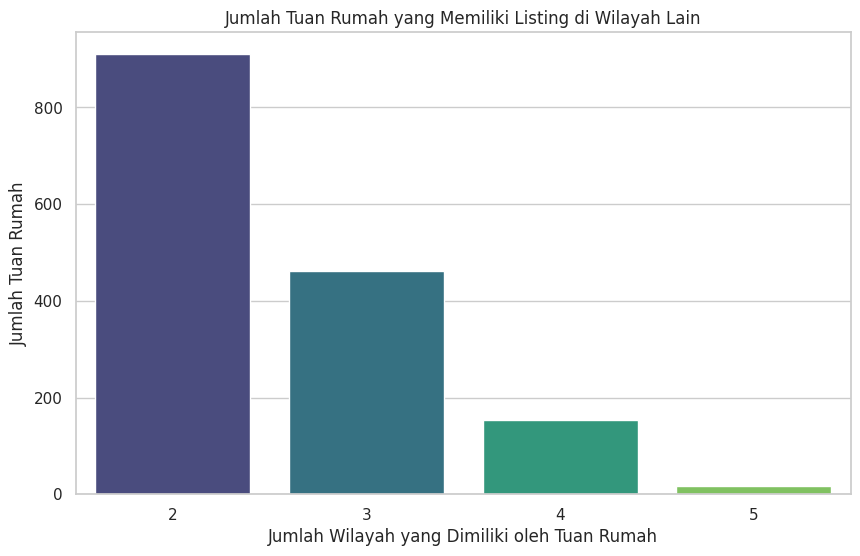

In [40]:
# Filter tuan rumah yang memiliki listing di 2, 3, 4, atau 5 wilayah
hosts_with_listings_in_multiple_boroughs = hosts_by_borough[hosts_by_borough.isin([2, 3, 4, 5])]

# Konfigurasi plot
plt.figure(figsize=(10, 6))
sns.countplot(x=hosts_with_listings_in_multiple_boroughs, palette='viridis')
plt.title('Jumlah Tuan Rumah yang Memiliki Listing di Wilayah Lain')
plt.xlabel('Jumlah Wilayah yang Dimiliki oleh Tuan Rumah')
plt.ylabel('Jumlah Tuan Rumah')
plt.show()

## 4. 5 tuan rumah dengan jumlah listing terbanyak berdasarkan wilayah

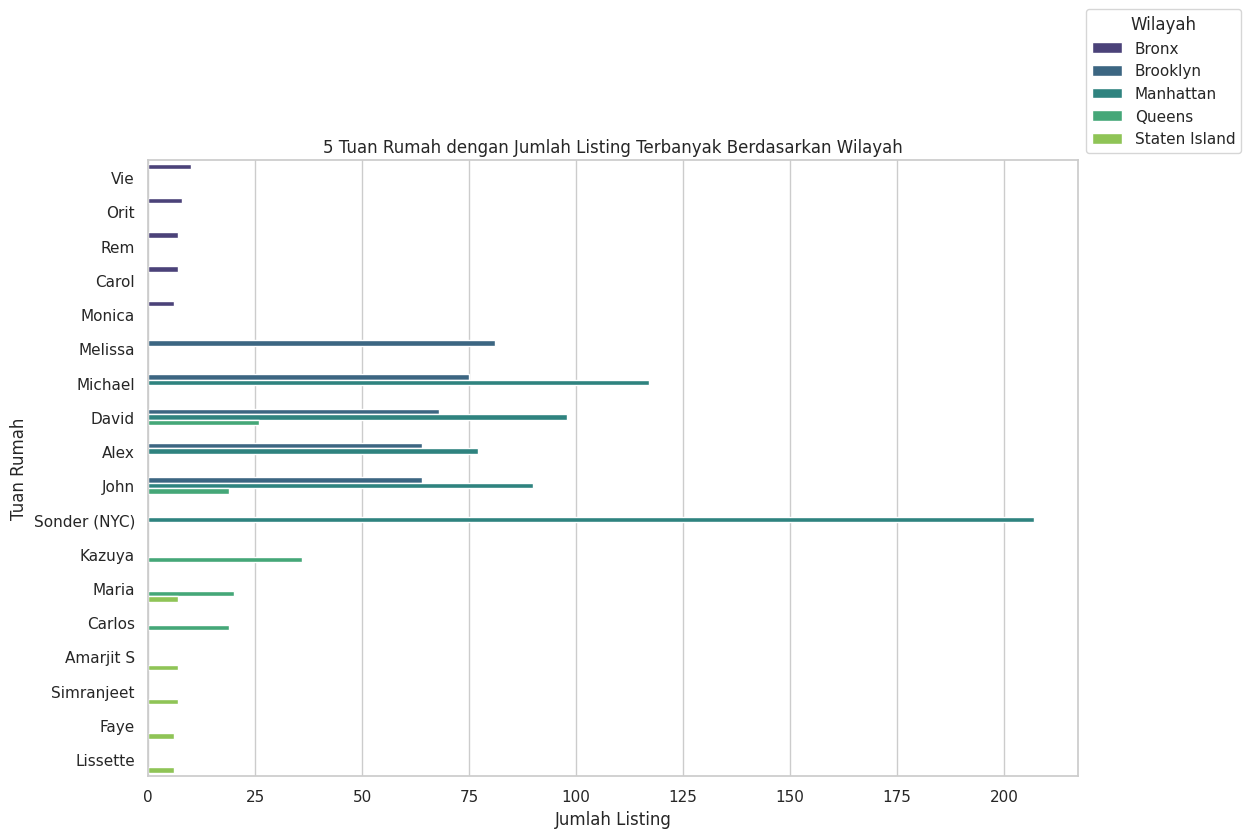

In [41]:
# Reset indeks agar kolom borough dapat digunakan dalam visualisasi
top_hosts_by_borough = top_hosts_by_borough.reset_index()

# Konfigurasi plot
plt.figure(figsize=(12, 8))
sns.barplot(x='host_name', y='level_1', hue='borough', data=top_hosts_by_borough, palette='viridis')
plt.title('5 Tuan Rumah dengan Jumlah Listing Terbanyak Berdasarkan Wilayah')
plt.xlabel('Jumlah Listing')
plt.ylabel('Tuan Rumah')
plt.legend(title='Wilayah', bbox_to_anchor=(1, 1))
plt.show()

# 4. Kesimpulan dan Interpretasi

Tahap terakhir adalah membuat kesimpulan dan interpretasi dari tahap-tahap yang telah dilakukan.

- Ringkas temuan-temuan penting dari analisis dan visualisasi.
- Buat kesimpulan terkait pertanyaan-pertanyaan yang diajukan.
- Sarankan langkah-langkah atau kebijakan berdasarkan hasil analisis.

## 1. Rata-rata harga per malam berdasarkan wilayah dan jenis kamar

Analisis rata-rata harga per malam menurut wilayah (borough) dan jenis kamar di New York City menghasilkan temuan yang menarik. Di Bronx, harga rata-rata per malam bervariasi, dengan entire home/apartment sekitar $120.52, private room sekitar $56.15, dan shared room sekitar $33.03. Brooklyn menunjukkan tren serupa, dengan entire home/apartment mencapai $169.90, private room $72.63, dan shared room $39.01 per malam. Sementara itu, Manhattan memiliki harga tertinggi, khususnya untuk entire home/apartment ($238.02) dan private room ($105.70), sementara shared room mencapai $72.96 per malam. Queens menawarkan harga yang lebih terjangkau dengan entire home/apartment sekitar $140.93, private room $63.74, dan shared room $40.77 per malam. Staten Island menunjukkan angka yang relatif rendah, dengan entire home/apartment sekitar $116.77, private room $56.06, dan shared room $21.50 per malam. Temuan ini memberikan wawasan yang berguna bagi calon penyewa atau pemilik properti untuk memahami dinamika harga di berbagai wilayah dan jenis kamar di kota tersebut.

## 2. 10 tuan rumah dengan jumlah listing terbanyak disemua wilayah

uan rumah paling produktif adalah Michael, yang memiliki mencengangkan 215 listing, diikuti oleh Sonder (NYC) dengan 207 listing. David menduduki peringkat ketiga dengan 197 listing, diikuti oleh John dengan 177 listing. Alex, Maria, Melissa, dan Daniel juga mencatatkan angka yang signifikan, masing-masing dengan 153, 122, 110, dan 103 listing. Anna dan Chris melengkapi daftar sepuluh besar dengan masing-masing 103 dan 94 listing. Informasi ini memberikan gambaran tentang kegiatan penyewaan yang tinggi dan dominasi sejumlah tuan rumah di pasar sewa kota tersebut.

## 3. Tuan rumah yang memiliki lebih listing lebih dari satu wilayah

Analisis data menunjukkan hasil menarik terkait tuan rumah yang memiliki lebih dari satu listing di wilayah New York City. Ternyata, tuan rumah yang memiliki listing di dua wilayah menempati peringkat pertama dalam jumlah terbanyak. Temuan ini menunjukkan adanya dominasi dari tuan rumah yang aktif beroperasi di lebih dari satu wilayah. Selanjutnya, pola penurunan terlihat secara bertahap pada tuan rumah dengan listing di 3 wilayah, 4 wilayah, dan 5 wilayah, menunjukkan semakin sedikitnya tuan rumah yang beroperasi di jumlah wilayah yang lebih besar. Hal ini memberikan gambaran dinamika distribusi listing di berbagai wilayah, dengan tuan rumah yang berfokus pada wilayah tertentu dan sebagian kecil yang memperluas jangkauan mereka ke lebih banyak wilayah.







## 4. 5 tuan rumah dengan jumlah listing terbanyak berdasarkan wilayah

Dalam dataset Airbnb yang dianalisis, terdapat beberapa tuan rumah yang berhasil melakukan diversifikasi bisnis dengan menyediakan listing di lebih dari satu wilayah di New York City. Contohnya, tuan rumah seperti Michael, David, dan Alex memiliki listing yang tersebar di beberapa wilayah, seperti Brooklyn dan Manhattan. Diversifikasi ini dapat diartikan sebagai strategi untuk mengakomodasi variasi permintaan dan kebutuhan pelanggan di berbagai lokasi. Tuan rumah yang berhasil melakukan diversifikasi mungkin dapat memitigasi risiko dan meningkatkan stabilitas pendapatan mereka. Hal ini juga dapat mencerminkan kemampuan mereka untuk beradaptasi dengan dinamika pasar yang berbeda di setiap wilayah. Kesuksesan diversifikasi bisnis dalam industri sewa Airbnb dapat tercermin dalam portofolio listing yang luas dan penyebaran geografis yang melibatkan berbagai wilayah di kota tersebut.

Penutup

Berdasarkan empat temuan kunci yang dianalisis, terdapat beberapa saran bisnis yang dapat diambil untuk meningkatkan kinerja dan fleksibilitas dalam industri sewa properti di New York City:

Penyesuaian Harga Berdasarkan Wilayah dan Jenis Kamar:

Untuk menarik lebih banyak penyewa dan meningkatkan daya saing, pertimbangkan untuk menyesuaikan harga sewa berdasarkan wilayah dan jenis kamar. Perhatikan pola harga yang terlihat, seperti harga yang lebih tinggi di Manhattan dan lebih rendah di Queens atau Staten Island. Ini dapat membantu menyesuaikan strategi harga sesuai dengan permintaan dan profil pelanggan di masing-masing wilayah.
Kolaborasi dengan Tuan Rumah Produktif:

Jalin kerjasama dengan tuan rumah yang produktif, seperti Michael, Sonder (NYC), dan David, untuk meningkatkan visibilitas dan pertumbuhan bisnis. Kerjasama dapat melibatkan penawaran khusus, promosi bersama, atau pengembangan strategi pemasaran yang lebih efektif.
Fokus pada Diversifikasi Geografis:

Untuk meningkatkan potensi pendapatan, pertimbangkan untuk memperluas jangkauan bisnis ke beberapa wilayah. Diversifikasi geografis, seperti yang dilakukan oleh beberapa tuan rumah yang memiliki listing di lebih dari satu wilayah, dapat membantu mengurangi risiko dan meningkatkan adaptasi terhadap perubahan permintaan pasar.
Analisis dan Strategi Berdasarkan Jumlah Listing:

Tuan rumah dengan jumlah listing tinggi seperti Michael, Sonder (NYC), dan David mungkin memiliki strategi yang sukses. Pelajari praktik terbaik dan strategi yang mereka terapkan untuk memperoleh dan mempertahankan jumlah listing yang signifikan. Kemungkinan adanya manfaat dari strategi pemasaran, layanan pelanggan, atau manajemen properti yang efektif.
Melalui penerapan saran-saran ini, diharapkan pemilik properti atau calon tuan rumah dapat meningkatkan daya saing, mengoptimalkan potensi pendapatan, dan menyesuaikan bisnis mereka dengan dinamika pasar yang berbeda di setiap wilayah New York City.